# --------------------------------BASIC DATA CLEANING--------------------------------

In [3]:
# Importing libraries---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create Dataframe----
import pandas as pd
df=pd.read_csv('Amazon Sale Report.csv',encoding= 'unicode_escape')

# check no of rows and columns---
df.shape

# get top data--
df.head()

# get last 5 data---
df.tail()

# to get info about data---
df.info()

# to remove un-related/blank column---[(axis=1-column wise delete),(inplace=True--- to delete permanently)]
#df.drop(['col. name','col. name'],axis=1,inplace=True)

# to check null values---
pd.isnull(df)

# to get total values of null values---
df.isnull().sum()

# to get colums names---
df.columns

# Group-by- group data based on one or more columns in dataframe-----
# df.groupby(['column'],as_index=False['column1'].sum().sort_values(by='column1'),ascending=False)
# as_index parameter is used to determine whether the grouping columns should be set as the index of the resulting DataFrame. 
# as_index=True (the default), the grouping columns become the index, and the aggregated data is organized accordingly.

In [ ]:
# to remove/drop null values---
df.dropna(inplace=True)

In [ ]:
# check null values---
df.shape

In [ ]:
# get column names---
df.columns

In [ ]:
# change data type---
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [ ]:
# check data type---
df['ship-postal-code'].dtype

In [ ]:
# change date data type---
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# to rename column name---
df.rename(columns={'Qty':'Quantity'},inplace=True)

In [ ]:
# checking for rename of column----
df.columns

In [ ]:
# to check for description of data in dataframe such as mean,std. deviation,count etc...describe() is only used for numerical data.
df.describe()

In [ ]:
# to check for description of objects-----
df.describe(include='object')

In [ ]:
# to check description for particular/specific columns---
df[['Quantity','Amount']].describe()

# ----------------------EXPLORATORY DATA ANALYSIS----------------------

# SIZE BASED ANALYSIS

In [39]:
# checking for rename of column----
df.columns

Index(['Index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

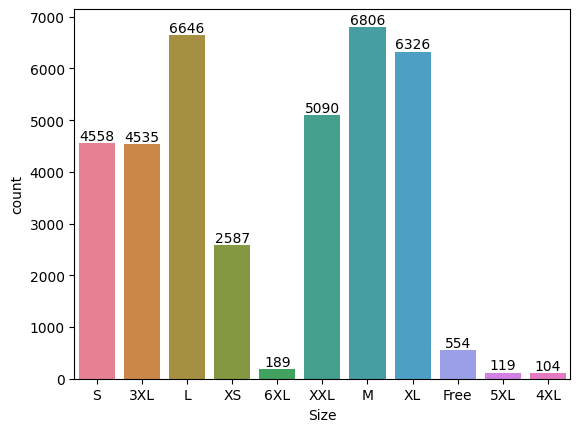

In [50]:
# count-plot based on size------
sz=sns.countplot(x='Size',data=df,hue='Size')

for bars in sz.containers:
    sz.bar_label(bars)

# NOTE: From graph it can be interpreted that most people buys M-size and 4XL is least buy product.

<Axes: xlabel='Size', ylabel='Quantity'>

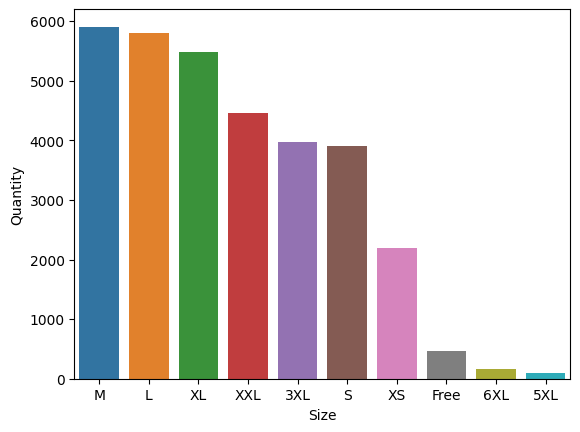

In [59]:
# sorting data based on size and qunatity-----
S_Qty=df.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)

# plotting bar-plot for sorted data-----
sns.barplot(x='Size',y='Quantity',data=S_Qty,hue='Size')

# NOTE:From Above graph we can analyze medium size is the most buyed quantity in sales.

# COURIER STATUS BASED ANALYSIS

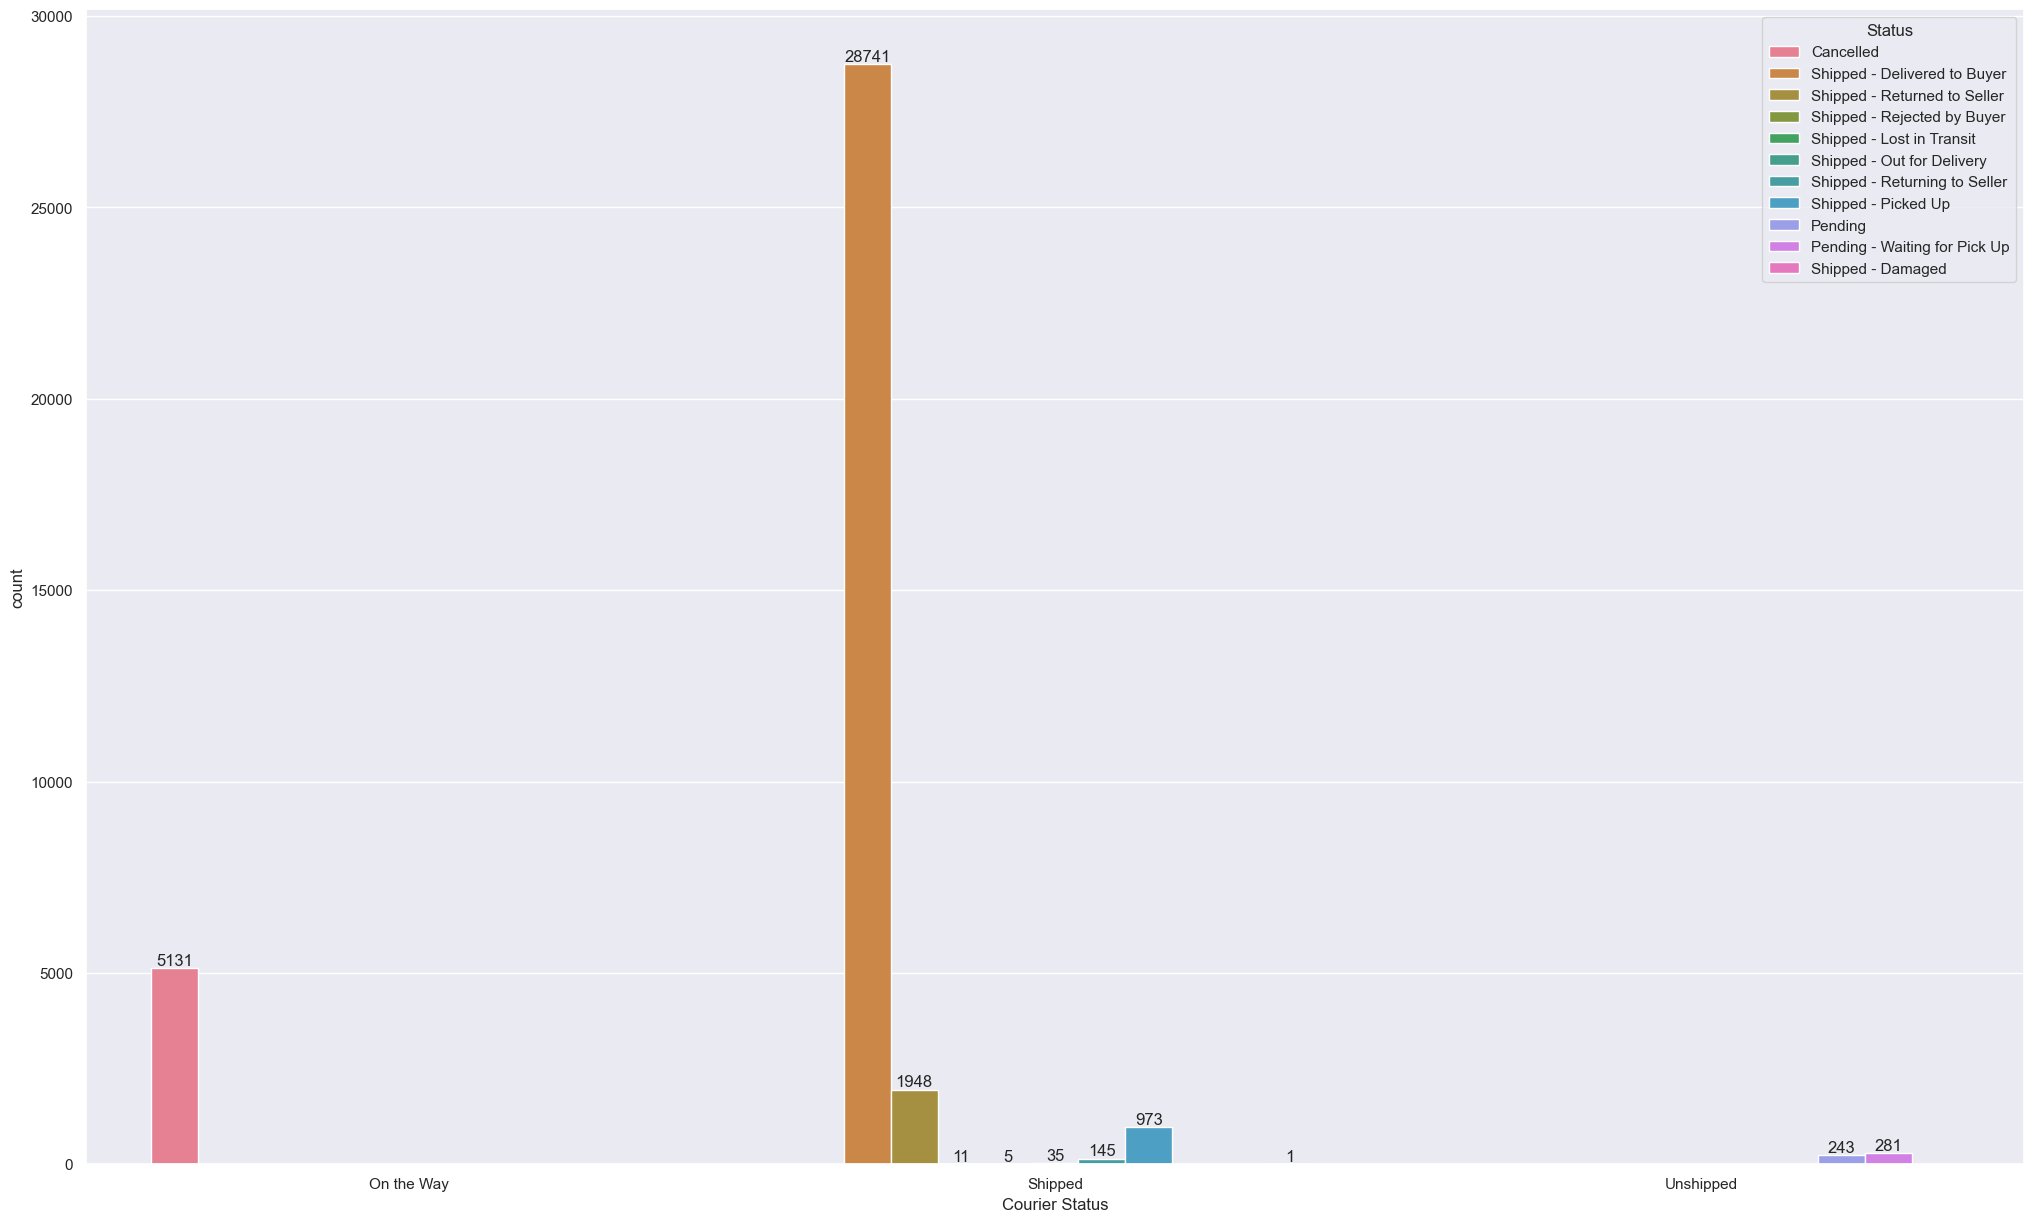

In [76]:
cs=sns.countplot(x='Courier Status',data=df,hue='Status')

# set bar-size to avoid overlapping--
sns.set(rc={'figure.figsize':(15,5)})

# plt.figure(figsize=(10,5))

for bars in cs.containers:
    cs.bar_label(bars)


# NOTE: From above graph it can be inferred that most orders are shipped through couriers.

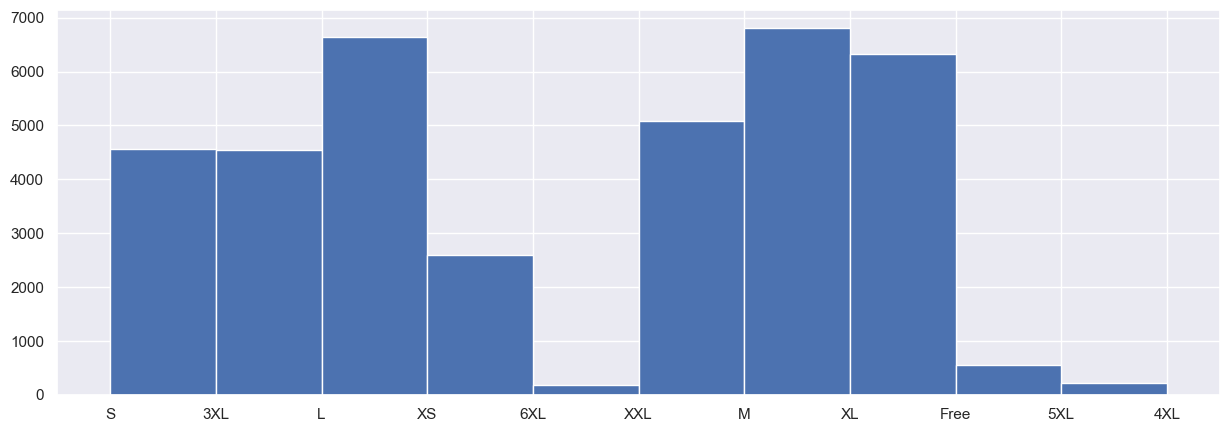

In [82]:
# plotting histogram graph for size---
df['Size'].hist()

# to get grid-lines---
plt.grid
plt.show()

# CATEGORY BASED ANALYSIS 

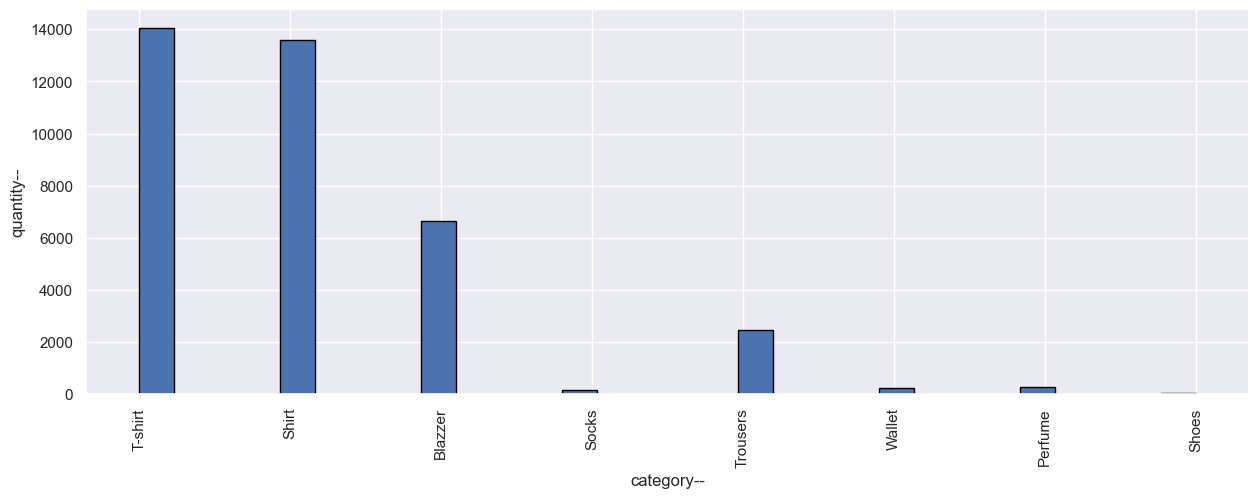

In [116]:
# changing CATEGORY datatype from 'OBJECT' TO 'STRING'---

df['Category']=df['Category'].astype(str)
Column_data=df['Category']

# changing figure size--
plt.figure(figsize=(15,5))

# plotting histogram plot for category---
plt.hist(Column_data,bins=30,edgecolor='Black')

# rotating x-axis data---
plt.xticks(rotation=90)

# x and y axis labels--
plt.xlabel('category--')
plt.ylabel('quantity--')

plt.show()


# histtype='bar'/'barstacked'/'step'/'stepfilled'
# cumulative=-1-reverse frequency of graph

# NOTE: From graph it can be infered that most buyed product is T-Shirt, Shirt and Blazzer.

# Checking B2B Data Analysis

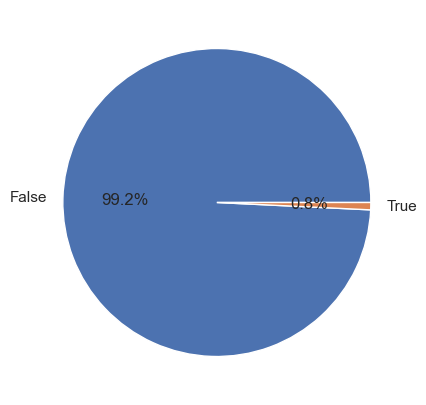

In [122]:
# value count for B2B---
Check_B2B=df['B2B'].value_counts()

# plotting pie-chart--
plt.pie(Check_B2B,labels=Check_B2B.index,autopct='%1.1f%%')
plt.show()

# NOTE: From pie-chart it is infered that 99.2% are retailers and 0.8% are B2B buyers.

# Category vs Size analysis

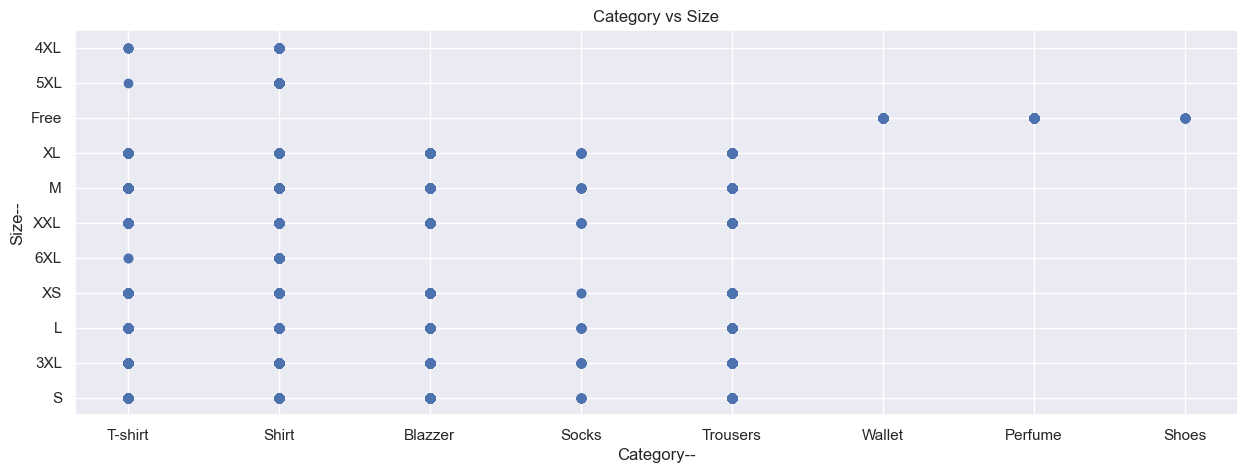

In [123]:
x_data=df['Category']
y_data=df['Size']

# plotting scatter graph--
plt.scatter(x_data,y_data)
plt.xlabel('Category--')
plt.ylabel('Size--')
plt.title('Category vs Size')
plt.show()

# Cities vs State Analysis

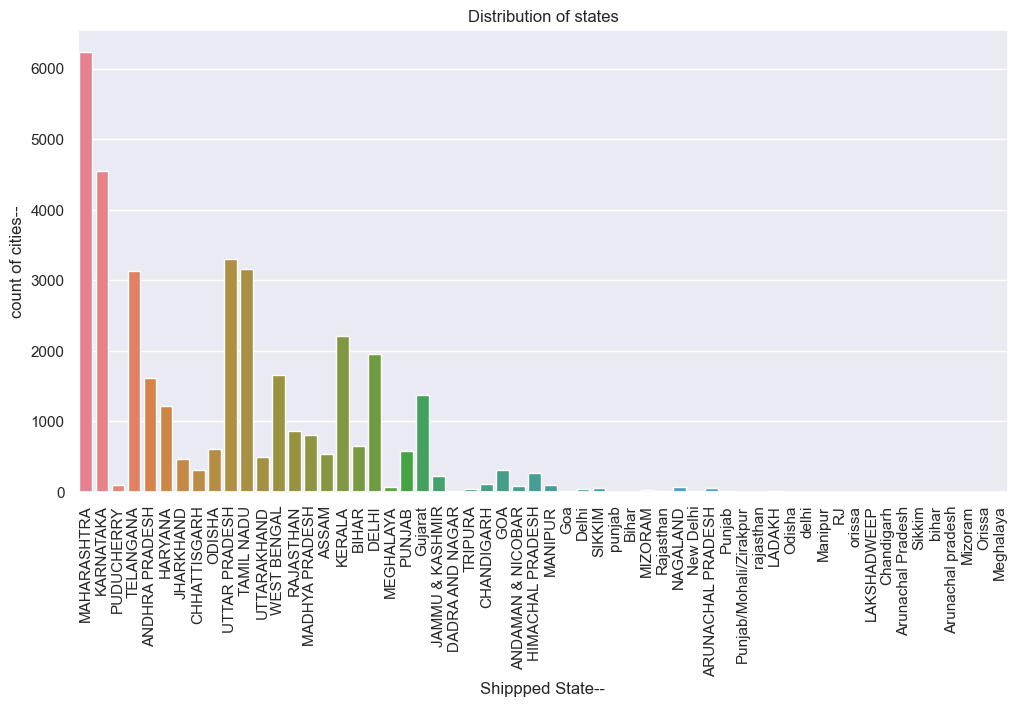

In [140]:
# set figure size---
plt.figure(figsize=(12,6))

sns.countplot(x='ship-state',data=df,hue='ship-state')
# labeling--
plt.xlabel('Shippped State--')
plt.ylabel('count of cities--')
# title--
plt.title('Distribution of states')
plt.xticks(rotation=90)
plt.show()

# NOTE:From above graph it is infered that most buyers are from Maharashtra state.

# CONCLUSION:
The data analysis reveals that business has significant customer base in Maharashtra state,serving mostly retailers,orders are fulfilled by Amazon.
Medium sized T-shirt are in high demand amomg buyers.